In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [6]:
address = '/Users/helenkapatsa/Repositories/big-data-pandas/авто.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

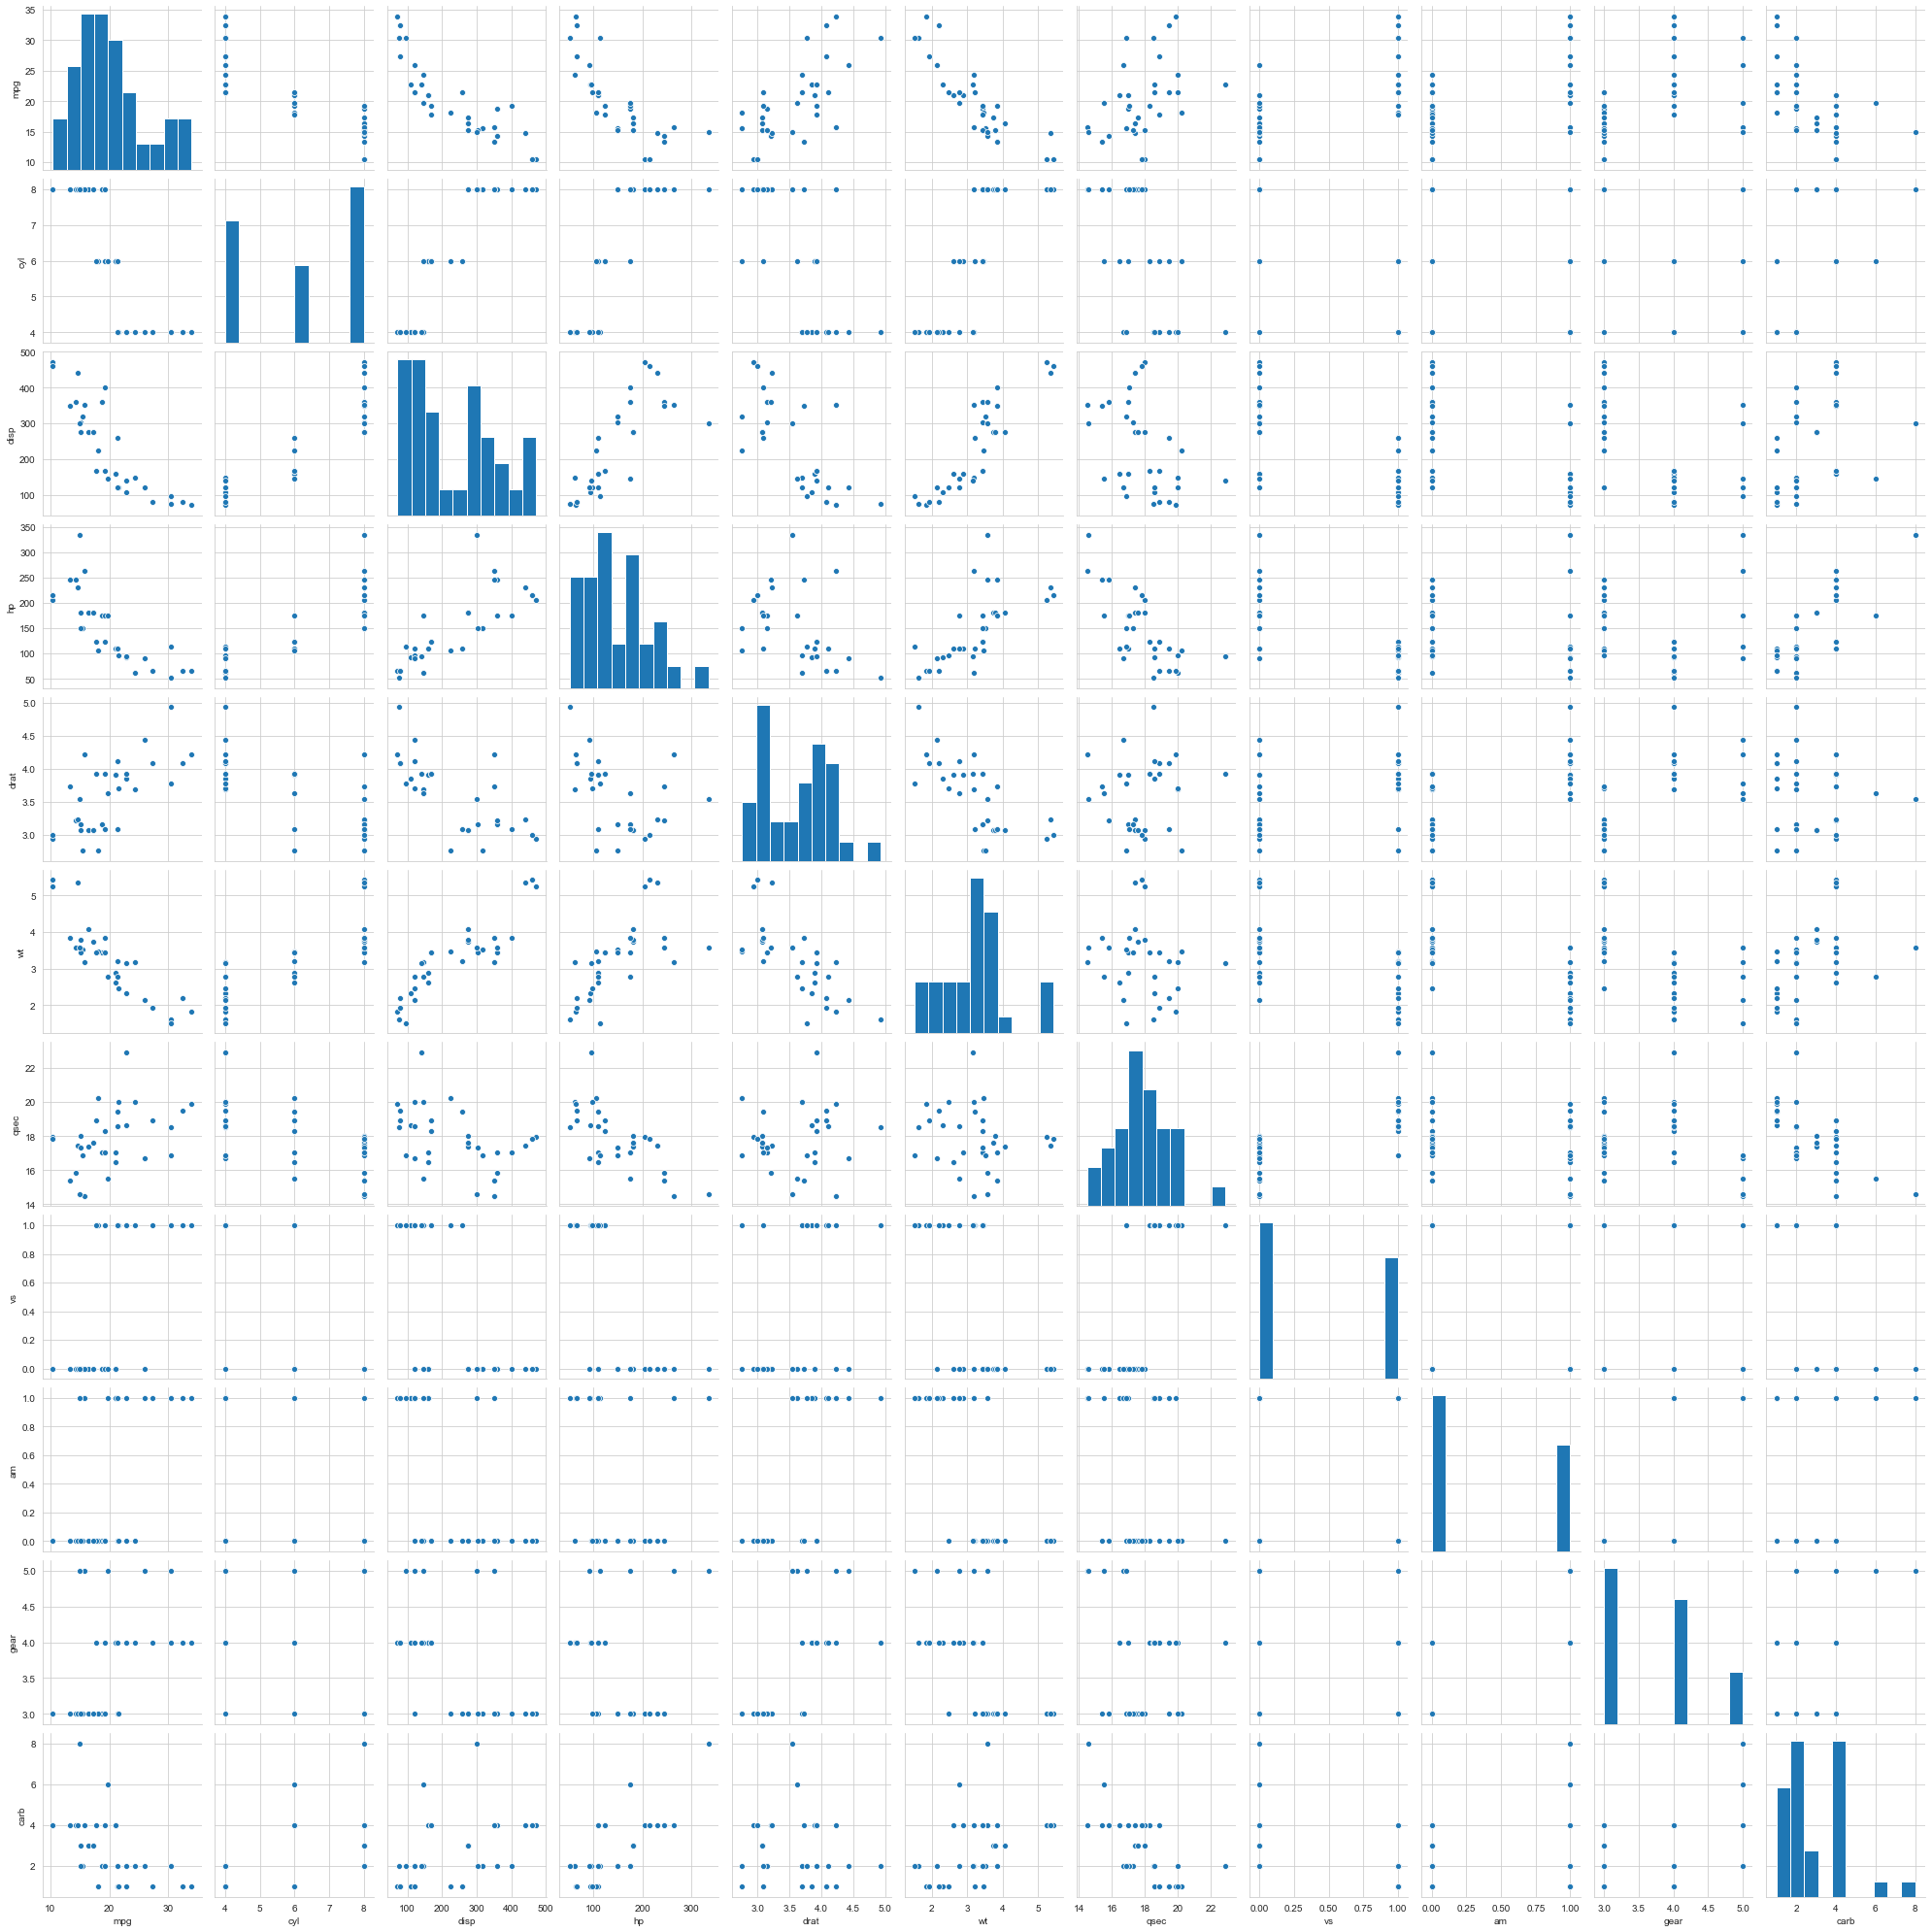

In [8]:
sb.pairplot(cars)

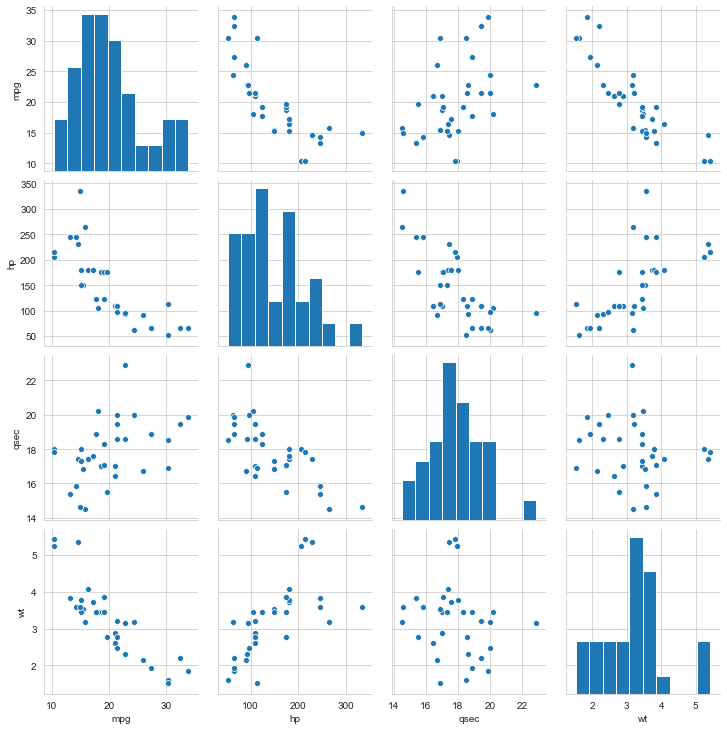

In [9]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

In [13]:
# Найдем среди этих корреляций те, что тяготеют к 1 или -1
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

# Миль на галлон топлива – количество лошадиных сил
pearsonr_coefficient, p_value = pearsonr(mpg, hp)
# 0.3f – отобразить до трех знаков после запятой. Знак процента осуществляет простую замену, но с форматированием, 
# в отличие от $ и #{}
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.776


In [15]:
# Миль на галлон топлива – время разгона до 100 км/ч
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient 0.419


In [16]:
# Миль на галлон топлива – вес
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.868


In [17]:
# Чем сильнеее стремится к -1 / 1, тем сильнее линейная корреляция. Сильная корреляция у mpg - wt. Такие данные впоследствии используются в машинном обучении для более сложных моделей.
corr = X.corr() # Краткий способ получить больше коэффициентов Корреляции Пирсона
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


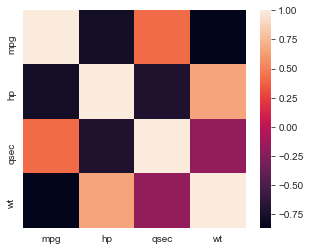

In [20]:
# Тепловая карта для визуализации корреляции. Чем темнее – тем сильнее корреляция (стремится к 1). Вес и количество миль на галлон топлива сильно коррелируют.
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)